In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
import pandas as pd
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
#from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import numpy as np

In [3]:
##end_date = datetime.today()
end_train_date = '2024-09-23'
start_test_date = '2024-09-23'
end_test_date = datetime.today()

In [4]:
eth = yf.Ticker("ETH-USD")

In [5]:
eth_data = eth.history(start='2020-01-01',end=end_test_date)

In [6]:
eth_hist = eth.history(start='2020-01-01',end=end_train_date)

In [7]:
eth_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01 00:00:00+00:00,129.630661,132.835358,129.198288,130.802002,7935230330,0.0,0.0
2020-01-02 00:00:00+00:00,130.820038,130.820038,126.954910,127.410179,8032709256,0.0,0.0
2020-01-03 00:00:00+00:00,127.411263,134.554016,126.490021,134.171707,10476845358,0.0,0.0
2020-01-04 00:00:00+00:00,134.168518,136.052719,133.040558,135.069366,7430904515,0.0,0.0
2020-01-05 00:00:00+00:00,135.072098,139.410202,135.045624,136.276779,7526675353,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-18 00:00:00+00:00,2341.732910,2369.729004,2278.664551,2369.729004,18159056422,0.0,0.0
2024-09-19 00:00:00+00:00,2369.374756,2492.204590,2369.374756,2464.752197,18437147349,0.0,0.0
2024-09-20 00:00:00+00:00,2464.782227,2571.992676,2439.377930,2561.072021,19112788620,0.0,0.0


In [8]:
eth_test = eth.history(start=start_test_date,end=end_test_date)

In [9]:
eth_test

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-23 00:00:00+00:00,2582.774902,2701.677734,2541.910400,2648.546387,19912841456,0.0,0.0
2024-09-24 00:00:00+00:00,2648.482178,2671.275879,2593.152100,2654.354980,16658812503,0.0,0.0
2024-09-25 00:00:00+00:00,2654.361572,2672.461914,2557.724365,2579.388672,14119729962,0.0,0.0
2024-09-26 00:00:00+00:00,2579.217529,2665.992676,2559.954346,2632.199951,17336033595,0.0,0.0
2024-09-27 00:00:00+00:00,2632.241943,2728.067627,2616.950928,2695.900635,17023020294,0.0,0.0
2024-09-28 00:00:00+00:00,2695.815918,2704.928711,2652.250488,2677.539062,10252590559,0.0,0.0
2024-09-29 00:00:00+00:00,2677.628662,2683.445801,2635.584961,2659.346924,11126215671,0.0,0.0
2024-09-30 00:00:00+00:00,2659.292725,2662.489014,2576.976074,2603.062744,17826446789,0.0,0.0
2024-10-01 00:00:00+00:00,2603.264160,2657.615479,2415.078613,2448.921143,25482371785,0.0,0.0


In [10]:
DF = eth_hist.reset_index().copy()

In [11]:
DF = DF[['Date','Close']]

In [12]:
DF = DF.sort_values(['Date'])

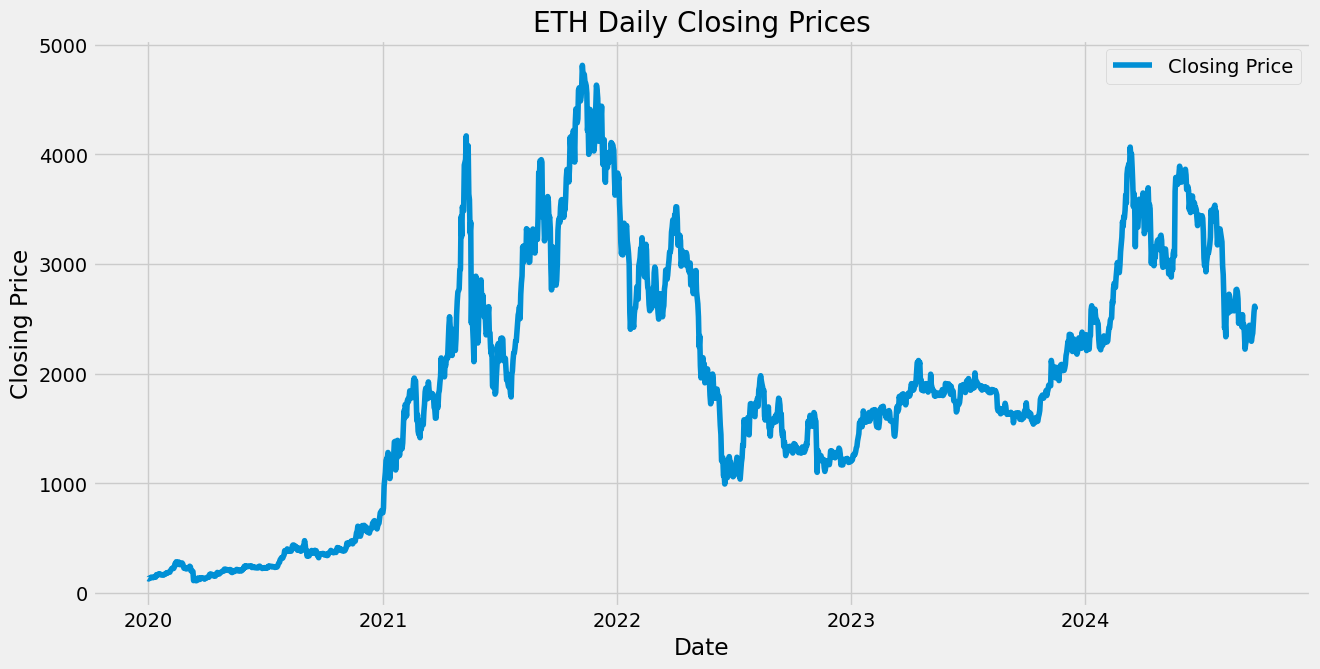

In [13]:
######################
plt.figure(figsize=(14, 7))
plt.plot(DF['Date'], DF['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('ETH Daily Closing Prices')
plt.legend()
plt.show()

/var/folders/dr/mrkz6zcx1tz_z87q4dtf9qym0000gn/T/ipykernel_7186/1322555545.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best')


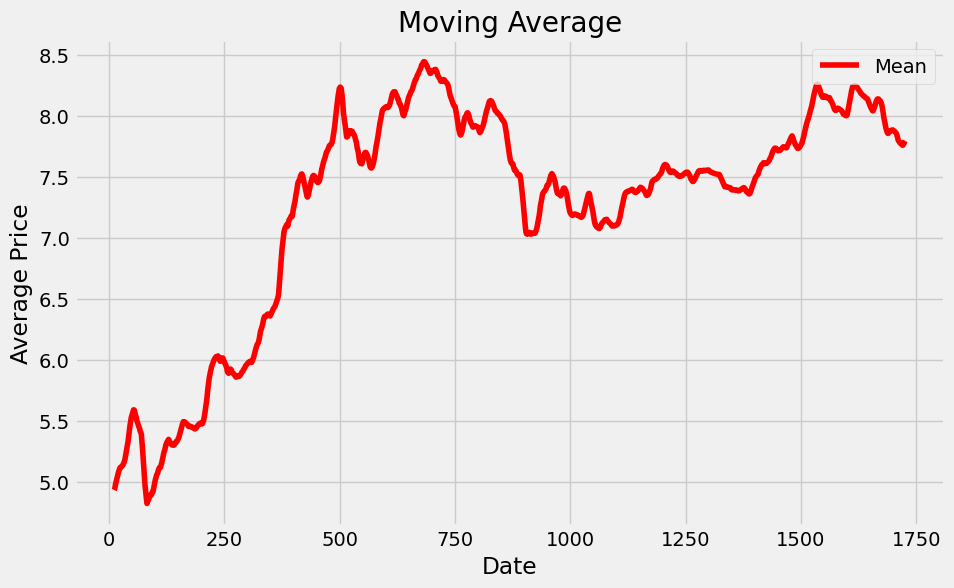

In [14]:
rcParams['figure.figsize'] = 10,6
df_log = np.log(DF['Close'])
moving_avg = df_log.rolling(12).mean()
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Moving Average')
plt.plot(moving_avg,color="red",label="Mean")
plt.legend()
plt.savefig('Moving_Average')

In [15]:
DF

,Date,Close
0,2020-01-01 00:00:00+00:00,130.802002
1,2020-01-02 00:00:00+00:00,127.410179
2,2020-01-03 00:00:00+00:00,134.171707
3,2020-01-04 00:00:00+00:00,135.069366
4,2020-01-05 00:00:00+00:00,136.276779
...,...,...
1722,2024-09-18 00:00:00+00:00,2369.729004
1723,2024-09-19 00:00:00+00:00,2464.752197
1724,2024-09-20 00:00:00+00:00,2561.072021
1725,2024-09-21 00:00:00+00:00,2615.857178


In [16]:
#setting index
DF.index = DF.Date
DF.drop('Date', axis=1, inplace=True)

In [17]:
eth_df = eth_data.reset_index()

In [18]:
eth_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-01 00:00:00+00:00,129.630661,132.835358,129.198288,130.802002,7935230330,0.0,0.0
1,2020-01-02 00:00:00+00:00,130.820038,130.820038,126.954910,127.410179,8032709256,0.0,0.0
2,2020-01-03 00:00:00+00:00,127.411263,134.554016,126.490021,134.171707,10476845358,0.0,0.0
3,2020-01-04 00:00:00+00:00,134.168518,136.052719,133.040558,135.069366,7430904515,0.0,0.0
4,2020-01-05 00:00:00+00:00,135.072098,139.410202,135.045624,136.276779,7526675353,0.0,0.0
...,...,...,...,...,...,...,...,...
1762,2024-10-28 00:00:00+00:00,2505.590576,2587.430176,2470.268311,2565.348145,18971841402,0.0,0.0
1763,2024-10-29 00:00:00+00:00,2565.417969,2680.054443,2560.153809,2637.957520,22185845095,0.0,0.0
1764,2024-10-30 00:00:00+00:00,2637.640137,2720.271484,2600.609619,2657.372559,22382690746,0.0,0.0
1765,2024-10-31 00:00:00+00:00,2657.213135,2667.559570,2501.572266,2515.799316,19760409505,0.0,0.0


In [19]:
eth_df.index = eth_df.Date
eth_df.drop('Date',axis = 1,inplace = True)

In [20]:
eth_df['Close']

Date
2020-01-01 00:00:00+00:00     130.802002
2020-01-02 00:00:00+00:00     127.410179
2020-01-03 00:00:00+00:00     134.171707
2020-01-04 00:00:00+00:00     135.069366
2020-01-05 00:00:00+00:00     136.276779
                                ...     
2024-10-28 00:00:00+00:00    2565.348145
2024-10-29 00:00:00+00:00    2637.957520
2024-10-30 00:00:00+00:00    2657.372559
2024-10-31 00:00:00+00:00    2515.799316
2024-11-01 00:00:00+00:00    2524.754639
Name: Close, Length: 1767, dtype: float64

In [21]:
closing_price = DF

In [22]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(closing_price)

In [23]:
scaled_data = scaler.fit_transform(closing_price)

In [24]:
x_train, y_train = [], []
for i in range(60,len(DF)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [25]:
x_train

array([[[0.00429569],
        [0.00357426],
        [0.00501243],
        ...,
        [0.02470445],
        [0.02470596],
        [0.02323579]],

       [[0.00357426],
        [0.00501243],
        [0.00520336],
        ...,
        [0.02470596],
        [0.02323579],
        [0.02304906]],

       [[0.00501243],
        [0.00520336],
        [0.00546017],
        ...,
        [0.02323579],
        [0.02304906],
        [0.02551619]],

       ...,

       [[0.70824782],
        [0.71709098],
        [0.68611   ],
        ...,
        [0.47455294],
        [0.48051303],
        [0.50072436]],

       [[0.71709098],
        [0.68611   ],
        [0.65167147],
        ...,
        [0.48051303],
        [0.50072436],
        [0.52121148]],

       [[0.68611   ],
        [0.65167147],
        [0.67326555],
        ...,
        [0.50072436],
        [0.52121148],
        [0.53286422]]])

In [26]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10


/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1667/1667 - 14s - 8ms/step - loss: 0.0032
Epoch 2/10
1667/1667 - 13s - 8ms/step - loss: 0.0011
Epoch 3/10
1667/1667 - 13s - 8ms/step - loss: 9.3201e-04
Epoch 4/10
1667/1667 - 13s - 8ms/step - loss: 7.5395e-04
Epoch 5/10
1667/1667 - 13s - 8ms/step - loss: 6.9881e-04
Epoch 6/10
1667/1667 - 13s - 8ms/step - loss: 6.4033e-04
Epoch 7/10
1667/1667 - 13s - 8ms/step - loss: 6.6712e-04
Epoch 8/10
1667/1667 - 14s - 8ms/step - loss: 6.1104e-04
Epoch 9/10
1667/1667 - 15s - 9ms/step - loss: 6.0578e-04
Epoch 10/10
1667/1667 - 13s - 8ms/step - loss: 5.9010e-04


In [27]:
test = eth_test

In [28]:
test.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-23 00:00:00+00:00,2582.774902,2701.677734,2541.910400,2648.546387,19912841456,0.0,0.0
2024-09-24 00:00:00+00:00,2648.482178,2671.275879,2593.152100,2654.354980,16658812503,0.0,0.0
2024-09-25 00:00:00+00:00,2654.361572,2672.461914,2557.724365,2579.388672,14119729962,0.0,0.0
2024-09-26 00:00:00+00:00,2579.217529,2665.992676,2559.954346,2632.199951,17336033595,0.0,0.0
2024-09-27 00:00:00+00:00,2632.241943,2728.067627,2616.950928,2695.900635,17023020294,0.0,0.0


In [29]:
#predicting 246 values, using past 60 from the train data
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = closing_price[len(closing_price['Close']) - len(test['Close']) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [30]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [31]:
test['Close']

Date
2024-09-23 00:00:00+00:00    2648.546387
2024-09-24 00:00:00+00:00    2654.354980
2024-09-25 00:00:00+00:00    2579.388672
2024-09-26 00:00:00+00:00    2632.199951
2024-09-27 00:00:00+00:00    2695.900635
2024-09-28 00:00:00+00:00    2677.539062
2024-09-29 00:00:00+00:00    2659.346924
2024-09-30 00:00:00+00:00    2603.062744
2024-10-01 00:00:00+00:00    2448.921143
2024-10-02 00:00:00+00:00    2365.231689
2024-10-03 00:00:00+00:00    2349.791260
2024-10-04 00:00:00+00:00    2414.793945
2024-10-05 00:00:00+00:00    2415.631836
2024-10-06 00:00:00+00:00    2439.957764
2024-10-07 00:00:00+00:00    2421.796631
2024-10-08 00:00:00+00:00    2439.840820
2024-10-09 00:00:00+00:00    2368.283447
2024-10-10 00:00:00+00:00    2383.857910
2024-10-11 00:00:00+00:00    2436.513428
2024-10-12 00:00:00+00:00    2476.523193
2024-10-13 00:00:00+00:00    2467.677002
2024-10-14 00:00:00+00:00    2628.899902
2024-10-15 00:00:00+00:00    2606.021973
2024-10-16 00:00:00+00:00    2611.102051
2024-10-17 

In [32]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_price = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


In [33]:
predicted_price

array([[0.5574341 ],
       [0.5495366 ],
       [0.52943724],
       [0.5318674 ],
       [0.5362372 ],
       [0.5367976 ],
       [0.54189813],
       [0.52937824],
       [0.5400587 ],
       [0.5391156 ],
       [0.568135  ],
       [0.5714062 ],
       [0.567891  ],
       [0.5532657 ],
       [0.5066851 ],
       [0.51577824],
       [0.51672405],
       [0.5172856 ],
       [0.51521075],
       [0.49804366],
       [0.5185021 ],
       [0.49698567],
       [0.500905  ],
       [0.4847765 ],
       [0.45476234],
       [0.46105254],
       [0.46680623],
       [0.48041677],
       [0.48849285],
       [0.47957975],
       [0.4827268 ],
       [0.49875343],
       [0.4959277 ],
       [0.47616637],
       [0.46845007],
       [0.47659385],
       [0.48343182],
       [0.5035676 ],
       [0.5251851 ],
       [0.5384232 ]], dtype=float32)

In [34]:
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [35]:
predicted_price

array([[2731.372 ],
       [2694.2422],
       [2599.7454],
       [2611.1707],
       [2631.715 ],
       [2634.3499],
       [2658.33  ],
       [2599.468 ],
       [2649.682 ],
       [2645.248 ],
       [2781.6824],
       [2797.0615],
       [2780.5352],
       [2711.7744],
       [2492.7766],
       [2535.5278],
       [2539.9746],
       [2542.6145],
       [2532.8599],
       [2452.149 ],
       [2548.3342],
       [2447.175 ],
       [2465.6016],
       [2389.7737],
       [2248.6626],
       [2278.2358],
       [2305.2866],
       [2369.2766],
       [2407.246 ],
       [2365.3413],
       [2380.1372],
       [2455.486 ],
       [2442.201 ],
       [2349.2932],
       [2313.0151],
       [2351.3032],
       [2383.4517],
       [2478.1196],
       [2579.7542],
       [2641.9927]], dtype=float32)

In [37]:
test['Close'].values

array([2648.54638672, 2654.35498047, 2579.38867188, 2632.19995117,
       2695.90063477, 2677.5390625 , 2659.34692383, 2603.06274414,
       2448.92114258, 2365.23168945, 2349.79125977, 2428.35473633])

In [36]:
# Evaluate the model
mse = np.mean((predicted_price - test['Close'].values) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 33558.23982859515


In [37]:
x_input = np.array([70, 80, 90])

In [38]:
n_features = 1
n_steps = 3

In [39]:
x_input = x_input.reshape((1, n_steps, n_features))

In [40]:
model.predict(x_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[2.544352]], dtype=float32)

In [41]:
scaler.inverse_transform(model.predict(x_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[12072.83]], dtype=float32)

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

ARIMA

In [42]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [44]:
close_price = DF

In [45]:
close_price

,Close
Date,
2020-01-01 00:00:00+00:00,130.802002
2020-01-02 00:00:00+00:00,127.410179
2020-01-03 00:00:00+00:00,134.171707
2020-01-04 00:00:00+00:00,135.069366
2020-01-05 00:00:00+00:00,136.276779
...,...
2024-09-18 00:00:00+00:00,2369.729004
2024-09-19 00:00:00+00:00,2464.752197
2024-09-20 00:00:00+00:00,2561.072021


<Figure size 1800x800 with 0 Axes>

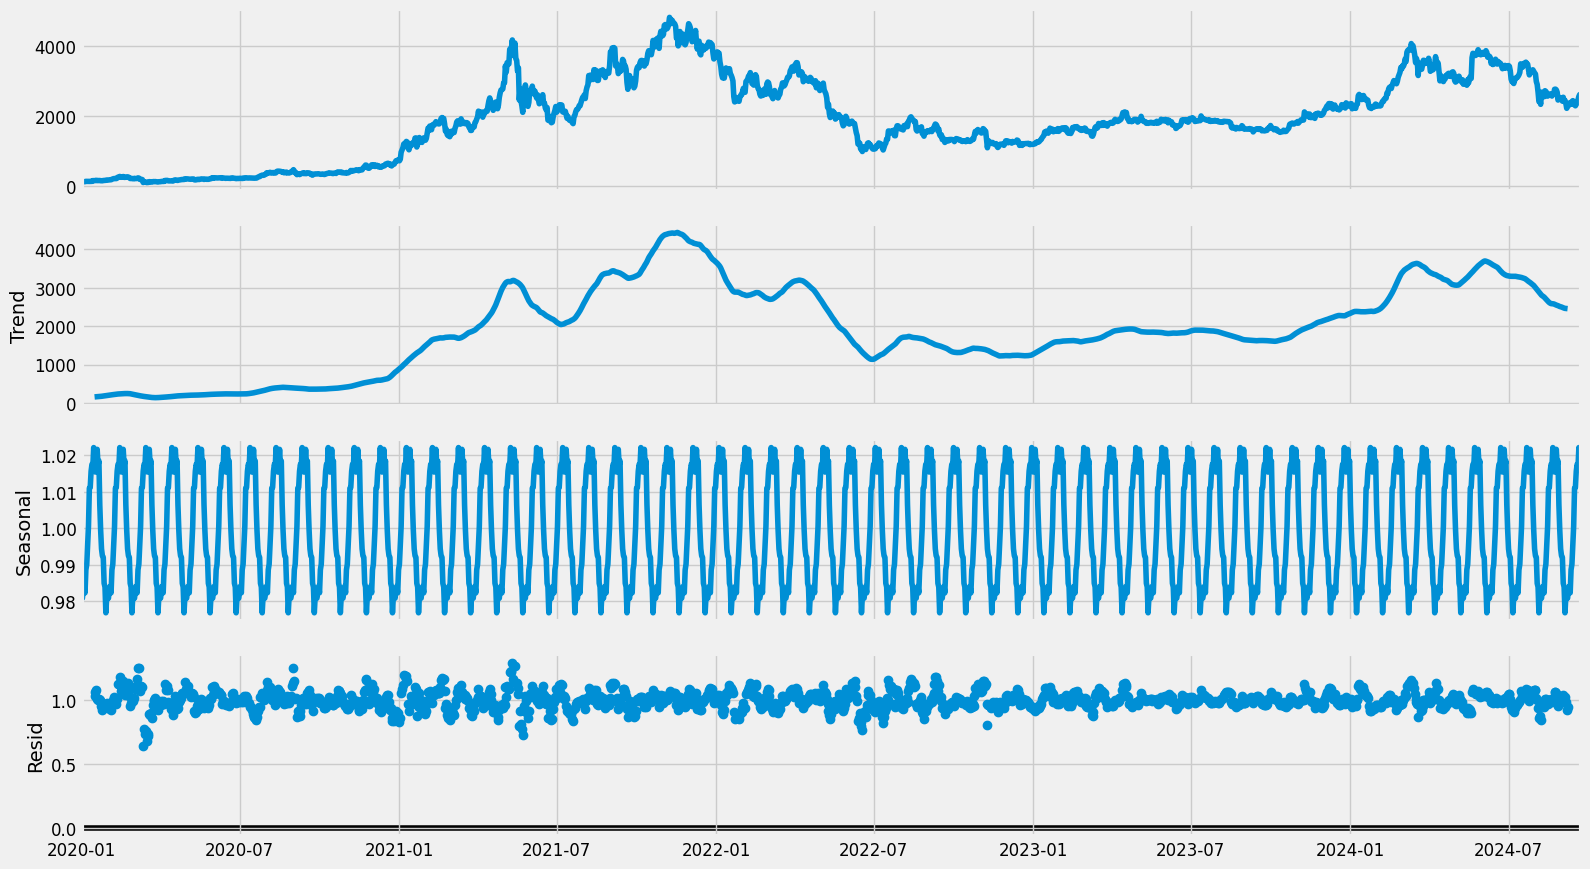

In [46]:
result = seasonal_decompose(close_price, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [47]:
model_autoARIMA = auto_arima(close_price, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20519.380, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20514.550, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20514.743, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20517.790, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20516.382, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20516.482, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20516.677, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=20513.016, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=20514.838, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=20514.941, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=20513.210, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=20515.084, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.303 seconds
                               SARIMAX Results                              

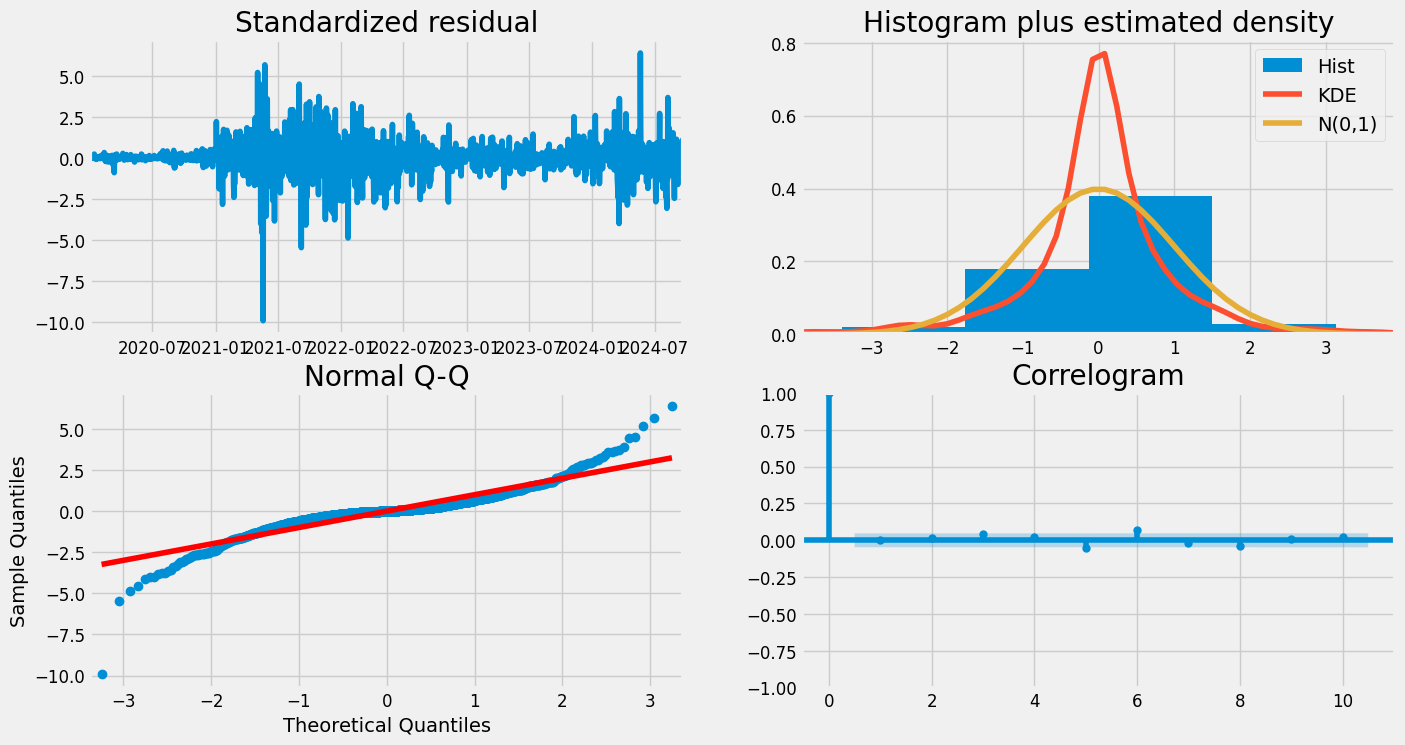

In [48]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

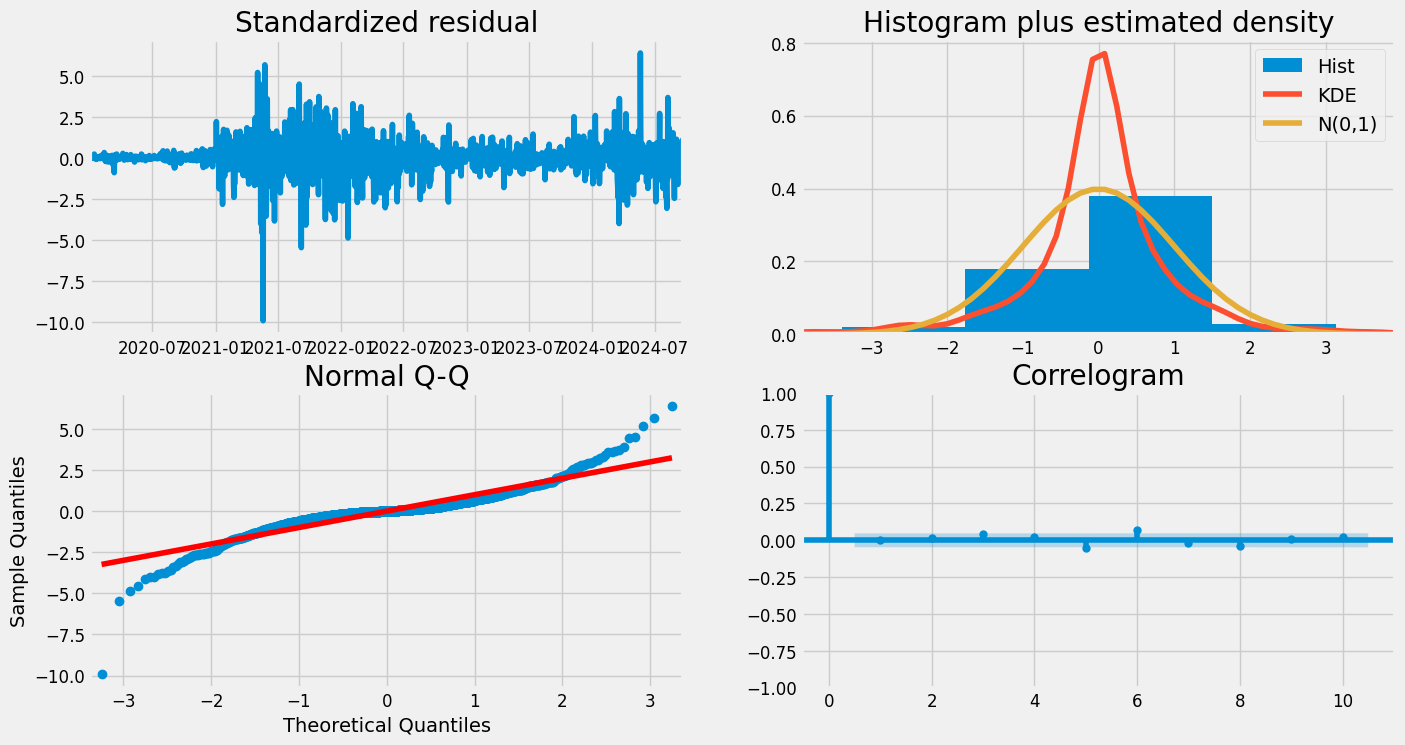

In [49]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [50]:
model = ARIMA(np.array(close_price), order=(3, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

#statsmodels.tsa.arima.model.ARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1727
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -10242.156
Date:                Fri, 01 Nov 2024   AIC                          20496.312
Time:                        22:56:06   BIC                          20529.034
Sample:                             0   HQIC                         20508.417
                               - 1727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3103      0.018    -17.717      0.000      -0.345      -0.276
ar.L2         -0.9781      0.013    -76.762      0.000      -1.003      -0.953
ar.L3         -0.0465      0.017     -2.726      0.0

/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
fc = fitted.forecast(12, alpha=0.05)

/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [52]:
fc

array([2593.4102273 , 2580.95824155, 2576.03927852, 2589.2542299 ,
       2590.5435895 , 2577.44701677, 2579.63546367, 2591.70582289,
       2586.42876628, 2576.15883623, 2583.94580475, 2591.81954499])

In [53]:
fc_series = pd.Series(fc, index=test.index)

ValueError: Length of values (12) does not match length of index (40)

In [54]:
fitted.forecast(12, alpha=0.05)

array([2593.4102273 , 2580.95824155, 2576.03927852, 2589.2542299 ,
       2590.5435895 , 2577.44701677, 2579.63546367, 2591.70582289,
       2586.42876628, 2576.15883623, 2583.94580475, 2591.81954499])

NameError: name 'fc_series' is not defined

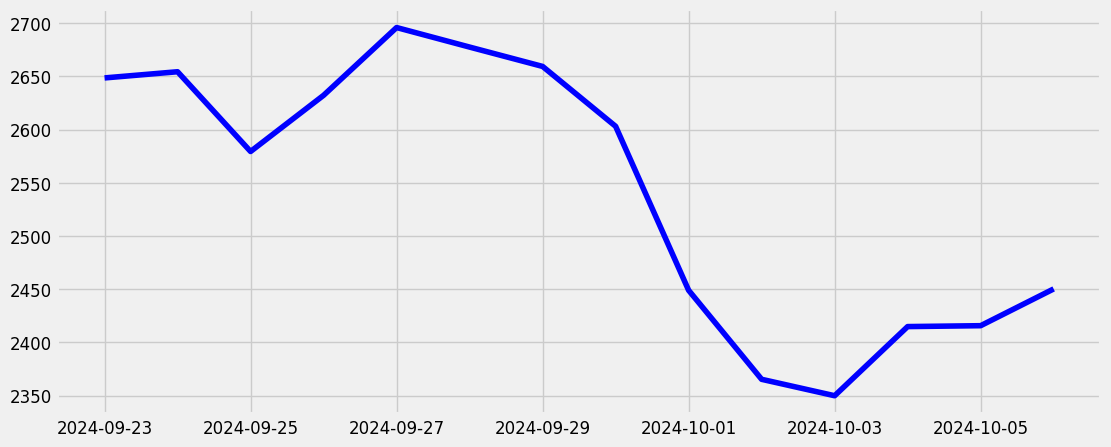

In [38]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_data, label='training')
plt.plot(test['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.10)
plt.title('Ethereum Closing Price')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [55]:
# Evaluate the model
mse = np.mean((fc - test['Close'].values) ** 2)
print("Mean Squared Error:", mse)

ValueError: operands could not be broadcast together with shapes (12,) (40,) 

Training the ARIMA model on the entire data.

In [56]:
model_ = ARIMA(np.array(eth_data['Close']), order=(3, 1, 2))  
fitted = model_.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1767
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -10481.007
Date:                Fri, 01 Nov 2024   AIC                          20974.014
Time:                        22:56:45   BIC                          21006.873
Sample:                             0   HQIC                         20986.155
                               - 1767                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1894      0.572     -0.331      0.740      -1.310       0.931
ar.L2          0.5428      0.336      1.616      0.106      -0.116       1.201
ar.L3          0.0424      0.036      1.165      0.2

,Close
Date,
2020-01-01 00:00:00+00:00,130.802002
2020-01-02 00:00:00+00:00,127.410179
2020-01-03 00:00:00+00:00,134.171707
2020-01-04 00:00:00+00:00,135.069366
2020-01-05 00:00:00+00:00,136.276779
...,...
2024-09-18 00:00:00+00:00,2369.729004
2024-09-19 00:00:00+00:00,2464.752197
2024-09-20 00:00:00+00:00,2561.072021


In [57]:
eth_fc = fitted.forecast(5, alpha=0.05)

/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [58]:
eth_fc

array([2520.75148754, 2521.47995445, 2519.54823767, 2520.14001108,
       2519.01016511])